In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/bastien/Documents/StageCMM/Mathematical_Morphologies_And_Deep_Learning/SourceCode')
import bastien_utils
import custom_regularizers
from shallowAE import ShallowAE
from sklearn.decomposition import PCA

/home/bastien/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
FILE_PATH = "../"
TEST_OUTPUTS = "../ShallowAE/Simple/TestOutputs/"
data = bastien_utils.load_data(FILE_PATH, train=True, test=True, subsetTest=True)
x_train, ytrain, x_test, y_test, x_small, y_small = data
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [11]:
AE_test = ShallowAE.load('18_07_09_dim100.h5')
#AE_test.svm_classifiation_score(x_test, y_test)

In [26]:
AE_test.decoder.get_weights()[0].shape

(100, 784)

In [30]:
AE_test.decoder.get_weights()[1].shape

(784,)

In [29]:
np.ones((3,4)) + np.arange(4)

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

In [18]:
W = AE_test.decoder.get_weights()[0]

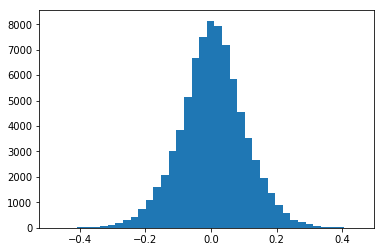

In [24]:
plt.hist(W.flatten(), bins=40)
plt.show()

In [24]:
svm_acc = np.load(TEST_OUTPUTS + '18_07_09_svm_acc_1_784.npy')
dims = np.load(TEST_OUTPUTS + '18_07_09_dims_1_784.npy')
test_errors = np.load(TEST_OUTPUTS + '18_07_09_test_errors_1_784.npy')
train_errors = np.load(TEST_OUTPUTS + '18_07_09_training_errors_1_784.npy')

In [26]:
d = {'Dimension': dims, 'Training reconstruction error': train_errors, 
                 'Test reconstruction error':test_errors, 'SVM classification accuracy': svm_acc}
output = pd.DataFrame(data=d)
output.to_csv(path_or_buf=TEST_OUTPUTS+ '18_07_09' + '_results_' + '1_784')

In [27]:
output

,Dimension,SVM classification accuracy,Test reconstruction error,Training reconstruction error
0,1,0.305,0.061411,0.061772
1,5,0.773,0.031194,0.031270
2,10,0.801,0.022999,0.022982
3,20,0.861,0.017602,0.017552
4,50,0.876,0.011532,0.011472
5,100,0.866,0.008434,0.008368
6,150,0.871,0.007079,0.007018
7,200,0.865,0.006249,0.006190
8,250,0.862,0.005634,0.005574
9,300,0.878,0.005197,0.005136


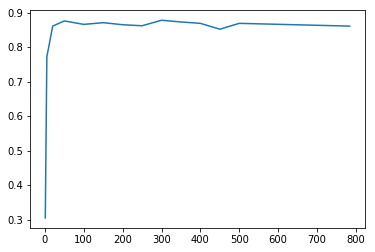

In [33]:
plt.plot(dims, svm_acc)
plt.show()

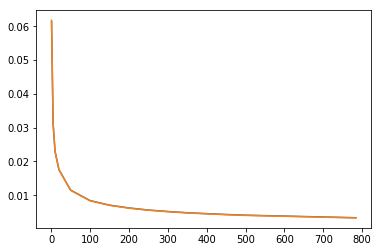

In [35]:
plt.plot(dims, test_errors)
plt.plot(dims, train_errors)
plt.show()

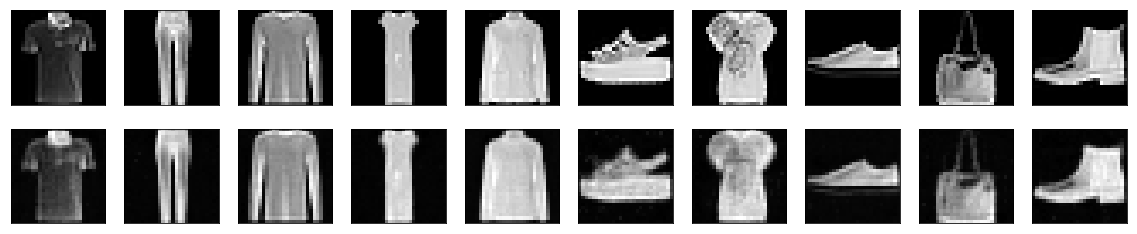

In [36]:
AE_test.plot_reconstructions(x_small)

In [37]:
AE_test = ShallowAE.load('18_07_09_dim100.h5')

In [38]:
bae = AE_test.best_SVM_classification_score(x_test, y_test, nb_values_C=10, nb_values_gamma=10)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=  19.6s
[CV] C=0.01, gamma=0.001 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.5s remaining:    0.0s


[CV] .............................. C=0.01, gamma=0.001, total=  18.7s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=  17.8s
[CV] C=0.01, gamma=0.003593813663804626 ..............................
[CV] ............... C=0.01, gamma=0.003593813663804626, total=  20.4s
[CV] C=0.01, gamma=0.003593813663804626 ..............................
[CV] ............... C=0.01, gamma=0.003593813663804626, total=  18.8s
[CV] C=0.01, gamma=0.003593813663804626 ..............................
[CV] ............... C=0.01, gamma=0.003593813663804626, total=  17.8s
[CV] C=0.01, gamma=0.01291549665014884 ...............................
[CV] ................ C=0.01, gamma=0.01291549665014884, total=  17.6s
[CV] C=0.01, gamma=0.01291549665014884 ...............................
[CV] ................ C=0.01, gamma=0.01291549665014884, total=  18.0s
[CV] C=0.01, gamma=0.01291549665014884 ...............................
[CV] .

[CV] ............... C=0.03593813663804628, gamma=100.0, total=  37.5s
[CV] C=0.1291549665014884, gamma=0.001 ...............................
[CV] ................ C=0.1291549665014884, gamma=0.001, total=  34.0s
[CV] C=0.1291549665014884, gamma=0.001 ...............................
[CV] ................ C=0.1291549665014884, gamma=0.001, total=  25.4s
[CV] C=0.1291549665014884, gamma=0.001 ...............................
[CV] ................ C=0.1291549665014884, gamma=0.001, total=  27.5s
[CV] C=0.1291549665014884, gamma=0.003593813663804626 ................
[CV] . C=0.1291549665014884, gamma=0.003593813663804626, total=  28.6s
[CV] C=0.1291549665014884, gamma=0.003593813663804626 ................
[CV] . C=0.1291549665014884, gamma=0.003593813663804626, total=  27.3s
[CV] C=0.1291549665014884, gamma=0.003593813663804626 ................
[CV] . C=0.1291549665014884, gamma=0.003593813663804626, total=  24.8s
[CV] C=0.1291549665014884, gamma=0.01291549665014884 .................
[CV] .

[CV] ................. C=0.464158883361278, gamma=100.0, total=  28.0s
[CV] C=0.464158883361278, gamma=100.0 ................................
[CV] ................. C=0.464158883361278, gamma=100.0, total=  28.4s
[CV] C=0.464158883361278, gamma=100.0 ................................
[CV] ................. C=0.464158883361278, gamma=100.0, total=  29.1s
[CV] C=1.6681005372000592, gamma=0.001 ...............................
[CV] ................ C=1.6681005372000592, gamma=0.001, total=  15.6s
[CV] C=1.6681005372000592, gamma=0.001 ...............................
[CV] ................ C=1.6681005372000592, gamma=0.001, total=  15.0s
[CV] C=1.6681005372000592, gamma=0.001 ...............................
[CV] ................ C=1.6681005372000592, gamma=0.001, total=  14.8s
[CV] C=1.6681005372000592, gamma=0.003593813663804626 ................
[CV] . C=1.6681005372000592, gamma=0.003593813663804626, total=   9.8s
[CV] C=1.6681005372000592, gamma=0.003593813663804626 ................
[CV] .

[CV] .... C=5.994842503189409, gamma=27.825594022071257, total=  28.0s
[CV] C=5.994842503189409, gamma=27.825594022071257 ...................
[CV] .... C=5.994842503189409, gamma=27.825594022071257, total=  27.9s
[CV] C=5.994842503189409, gamma=100.0 ................................
[CV] ................. C=5.994842503189409, gamma=100.0, total=  27.8s
[CV] C=5.994842503189409, gamma=100.0 ................................
[CV] ................. C=5.994842503189409, gamma=100.0, total=  27.2s
[CV] C=5.994842503189409, gamma=100.0 ................................
[CV] ................. C=5.994842503189409, gamma=100.0, total=  31.2s
[CV] C=21.544346900318846, gamma=0.001 ...............................
[CV] ................ C=21.544346900318846, gamma=0.001, total=   6.1s
[CV] C=21.544346900318846, gamma=0.001 ...............................
[CV] ................ C=21.544346900318846, gamma=0.001, total=   6.0s
[CV] C=21.544346900318846, gamma=0.001 ...............................
[CV] .

[CV] ..... C=77.42636826811278, gamma=7.742636826811277, total=  38.5s
[CV] C=77.42636826811278, gamma=27.825594022071257 ...................
[CV] .... C=77.42636826811278, gamma=27.825594022071257, total=  38.2s
[CV] C=77.42636826811278, gamma=27.825594022071257 ...................
[CV] .... C=77.42636826811278, gamma=27.825594022071257, total=  40.8s
[CV] C=77.42636826811278, gamma=27.825594022071257 ...................
[CV] .... C=77.42636826811278, gamma=27.825594022071257, total=  39.6s
[CV] C=77.42636826811278, gamma=100.0 ................................
[CV] ................. C=77.42636826811278, gamma=100.0, total=  38.7s
[CV] C=77.42636826811278, gamma=100.0 ................................
[CV] ................. C=77.42636826811278, gamma=100.0, total=  39.9s
[CV] C=77.42636826811278, gamma=100.0 ................................
[CV] ................. C=77.42636826811278, gamma=100.0, total=  41.1s
[CV] C=278.2559402207126, gamma=0.001 ................................
[CV] .

[CV] ................ C=1000.0, gamma=7.742636826811277, total=  32.4s
[CV] C=1000.0, gamma=7.742636826811277 ...............................
[CV] ................ C=1000.0, gamma=7.742636826811277, total=  32.8s
[CV] C=1000.0, gamma=7.742636826811277 ...............................
[CV] ................ C=1000.0, gamma=7.742636826811277, total=  29.9s
[CV] C=1000.0, gamma=27.825594022071257 ..............................
[CV] ............... C=1000.0, gamma=27.825594022071257, total=  30.0s
[CV] C=1000.0, gamma=27.825594022071257 ..............................
[CV] ............... C=1000.0, gamma=27.825594022071257, total=  29.8s
[CV] C=1000.0, gamma=27.825594022071257 ..............................
[CV] ............... C=1000.0, gamma=27.825594022071257, total=  29.0s
[CV] C=1000.0, gamma=100.0 ...........................................
[CV] ............................ C=1000.0, gamma=100.0, total=  29.7s
[CV] C=1000.0, gamma=100.0 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 142.4min finished


In [39]:
print(bae)

0.861


In [2]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, train_test_split
from sklearn import svm

In [3]:
FILE_PATH = "../"
TEST_OUTPUTS = "../ShallowAE/Simple/TestOutputs/"
data = bastien_utils.load_data(FILE_PATH, train=False, test=True, subsetTest=False)
x_test, y_test = data
print('x_test shape:', x_test.shape)

x_test shape: (10000, 28, 28, 1)


In [ ]:
H_train, H_test, Y_train, Y_test = train_test_split(x_test.reshape((10000, 784)), y_test, test_size=0.1)
C_range = np.logspace(-2, 3, 10)
gamma_range = np.logspace(-3, 2, 10)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
grid = GridSearchCV(svm.SVC(cache_size=1000), param_grid=param_grid, cv=cv, verbose=2)
grid.fit(H_train, Y_train)
print(grid.score(H_test, Y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total= 1.9min
[CV] C=0.01, gamma=0.001 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min remaining:    0.0s


[CV] .............................. C=0.01, gamma=0.001, total= 2.7min
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total= 2.7min
[CV] C=0.01, gamma=0.003593813663804626 ..............................
[CV] ............... C=0.01, gamma=0.003593813663804626, total= 2.3min
[CV] C=0.01, gamma=0.003593813663804626 ..............................
[CV] ............... C=0.01, gamma=0.003593813663804626, total= 2.4min
[CV] C=0.01, gamma=0.003593813663804626 ..............................
[CV] ............... C=0.01, gamma=0.003593813663804626, total= 2.3min
[CV] C=0.01, gamma=0.01291549665014884 ...............................
[CV] ................ C=0.01, gamma=0.01291549665014884, total= 2.1min
[CV] C=0.01, gamma=0.01291549665014884 ...............................
[CV] ................ C=0.01, gamma=0.01291549665014884, total= 2.1min
[CV] C=0.01, gamma=0.01291549665014884 ...............................
[CV] .

[CV] ............... C=0.03593813663804628, gamma=100.0, total= 2.9min
[CV] C=0.1291549665014884, gamma=0.001 ...............................
[CV] ................ C=0.1291549665014884, gamma=0.001, total= 1.5min
[CV] C=0.1291549665014884, gamma=0.001 ...............................
[CV] ................ C=0.1291549665014884, gamma=0.001, total= 1.6min
[CV] C=0.1291549665014884, gamma=0.001 ...............................
[CV] ................ C=0.1291549665014884, gamma=0.001, total= 1.5min
[CV] C=0.1291549665014884, gamma=0.003593813663804626 ................
[CV] . C=0.1291549665014884, gamma=0.003593813663804626, total= 1.1min
[CV] C=0.1291549665014884, gamma=0.003593813663804626 ................
[CV] . C=0.1291549665014884, gamma=0.003593813663804626, total= 1.1min
[CV] C=0.1291549665014884, gamma=0.003593813663804626 ................
[CV] . C=0.1291549665014884, gamma=0.003593813663804626, total= 1.1min
[CV] C=0.1291549665014884, gamma=0.01291549665014884 .................
[CV] .